# Stock Market Analysis of the S&P 500 Index

This post includes code and notes adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader
import datetime
import pandas_datareader.data as web

In [50]:
import statsmodels.api as sm
import quandl

In [51]:
start = datetime.datetime(1960, 1, 1)
end = pd.to_datetime('today')

In [52]:
SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH",start_date = start,end_date = end)
SP500

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22
...,...
2020-08-01,3391.71
2020-08-31,3500.31
2020-09-01,3526.65


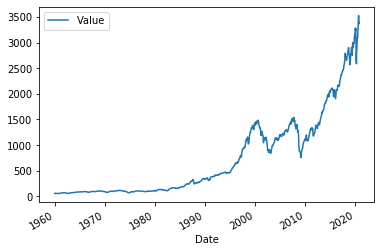

In [53]:
SP500.plot()

In [55]:
SP500.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '2020-05-01', '2020-06-01', '2020-06-30', '2020-07-01',
               '2020-07-31', '2020-08-01', '2020-08-31', '2020-09-01',
               '2020-09-30', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', length=740, freq=None)

In [56]:
SP500.head()

,Value
Date,
1960-01-01,58.03
1960-02-01,55.78
1960-03-01,55.02
1960-04-01,55.73
1960-05-01,55.22


Text(0, 0.5, 'SP500 Value')

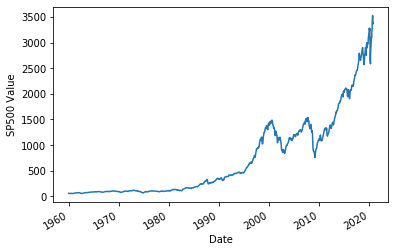

In [58]:
SP500['Value'].plot()
plt.ylabel("SP500 Value")

## Getting at the trend by removing the cyclical elements of the S&P 500 

In [61]:
# Tuple unpacking
SP500_cycle, SP500_trend = sm.tsa.filters.hpfilter(SP500.Value)

In [62]:
SP500_cycle

Date
1960-01-01      3.642040
1960-02-01      0.893330
1960-03-01     -0.367657
1960-04-01     -0.163754
1960-05-01     -1.187567
                 ...    
2020-08-01    134.761963
2020-08-31    213.461317
2020-09-01    209.742540
2020-09-30     16.019072
2020-10-01      3.743264
Name: Value, Length: 740, dtype: float64

In [63]:
type(SP500_cycle)

pandas.core.series.Series

In [64]:
SP500["trend"] = SP500_trend

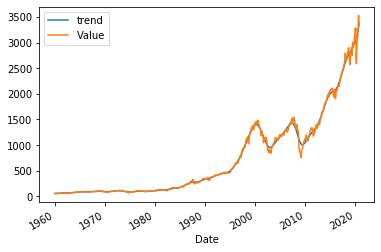

In [65]:
SP500[['trend','Value']].plot()

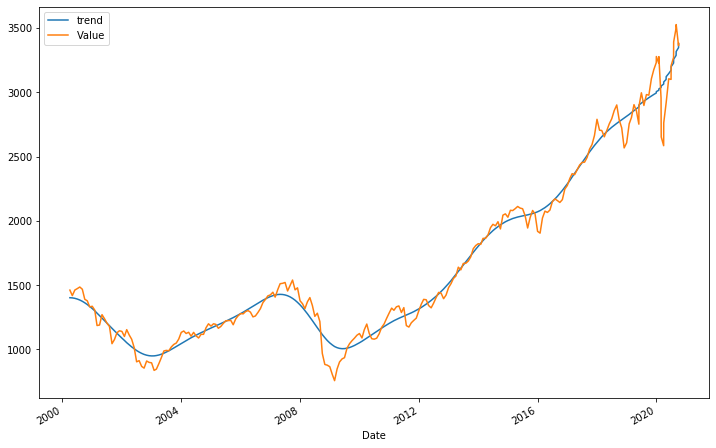

In [66]:
SP500[['trend','Value']]["2000-03-31":].plot(figsize=(12,8))